In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve


In [6]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../data/raw/Base.csv')

In [7]:
# Identify columns with string values
string_columns = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical variables
label_encoder = LabelEncoder()
for col in string_columns:
    df[col] = label_encoder.fit_transform(df[col])
    print(col)

# Separate fraud and non-fraud data
fraud_data = df[df['fraud_bool'] == 1]
non_fraud_data = df[df['fraud_bool'] == 0]

# Undersample non-fraud data to match the size of the fraud data
undersampled_non_fraud_data = resample(non_fraud_data, replace=False, n_samples=len(fraud_data), random_state=42)

# Combine fraud and undersampled non-fraud data
combined_data = pd.concat([fraud_data, undersampled_non_fraud_data])

# Split the combined data into features (X) and target labels (y)
X = combined_data.drop('fraud_bool', axis=1)
y = combined_data['fraud_bool']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

bm_pred = baseline_model.predict(X_test)
bm_roc_auc = roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:,1])
fpr_bm, tpr_bm, thresholds_bm = roc_curve(y_test, baseline_model.predict_proba(X_test)[:,1])

# Evaluate the performance of the baseline_mode
accuracy = accuracy_score(y_test, bm_pred)
report = classification_report(y_test, bm_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


payment_type
employment_status
housing_status
source
device_os
Accuracy: 0.6749773345421578
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.68      0.67      2180
           1       0.68      0.67      0.68      2232

    accuracy                           0.67      4412
   macro avg       0.67      0.68      0.67      4412
weighted avg       0.68      0.67      0.67      4412



/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)


In [10]:

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_rfe, y_train)
dt_pred = dt_model.predict(X_test_rfe)
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test_rfe)[:,1])
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_model.predict_proba(X_test_rfe)[:,1])


In [11]:

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)
gb_roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test_scaled)[:,1])
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gb_model.predict_proba(X_test_scaled)[:,1])


In [12]:

# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:,1])
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_model.predict_proba(X_test_scaled)[:,1])


In [13]:

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_rfe, y_train)
rf_pred = rf_model.predict(X_test_rfe)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_rfe)[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test_rfe)[:,1])


In [14]:

# Grid Search with Random Forest
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
rf_grid.fit(X_train_rfe, y_train)
rf_grid_pred = rf_grid.predict(X_test_rfe)
rf_grid_roc_auc = roc_auc_score(y_test, rf_grid.predict_proba(X_test_rfe)[:,1])
fpr_rf_grid, tpr_rf_grid, thresholds_rf_grid = roc_curve(y_test, rf_grid.predict_proba(X_test_rfe)[:,1])


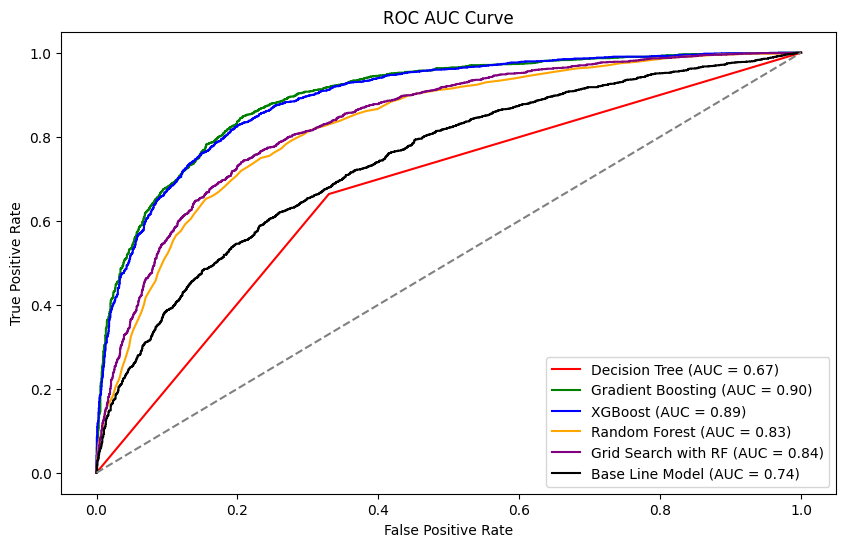

In [15]:

# Plot ROC AUC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})', color='red')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {gb_roc_auc:.2f})', color='green')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_roc_auc:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_roc_auc:.2f})', color='orange')
plt.plot(fpr_rf_grid, tpr_rf_grid, label=f'Grid Search with RF (AUC = {rf_grid_roc_auc:.2f})', color='purple')
plt.plot(fpr_bm, tpr_bm, label=f'Base Line Model (AUC = {bm_roc_auc:.2f})', color='black')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()
